<a href="https://colab.research.google.com/github/Deadcoder001/DSP-lab/blob/main/AMLT_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
data = pd.read_csv(url)
print("Initial Dataset:\n", data.head())

Initial Dataset:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
# Step 1: Handle Missing Values
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())
imputer = SimpleImputer(strategy='mean')
data_imputed =pd.DataFrame(imputer.fit_transform(data.select_dtypes(include=[np.number])),
columns=data.select_dtypes(include=[np.number]).columns)
data[data_imputed.columns] = data_imputed
# Verify missing values are handled
print("\nDataset After Handling Missing Values:\n", data.head())


Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Dataset After Handling Missing Values:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [7]:
# Step 2: Normalize Numerical Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=[np.number]))
# Convert normalized data back to a DataFrame
data_scaled = pd.DataFrame(data_scaled,
columns=data.select_dtypes(include=[np.number]).columns)
# Add non-numerical columns back to the DataFrame (e.g., species)
data_scaled[data.select_dtypes(exclude=[np.number]).columns]=data.select_dtypes(exclude=[np.number])
print("\nDataset After Normalization:\n", data_scaled.head())


Dataset After Normalization:
    sepal_length  sepal_width  petal_length  petal_width species
0     -0.900681     1.019004     -1.340227    -1.315444  setosa
1     -1.143017    -0.131979     -1.340227    -1.315444  setosa
2     -1.385353     0.328414     -1.397064    -1.315444  setosa
3     -1.506521     0.098217     -1.283389    -1.315444  setosa
4     -1.021849     1.249201     -1.340227    -1.315444  setosa


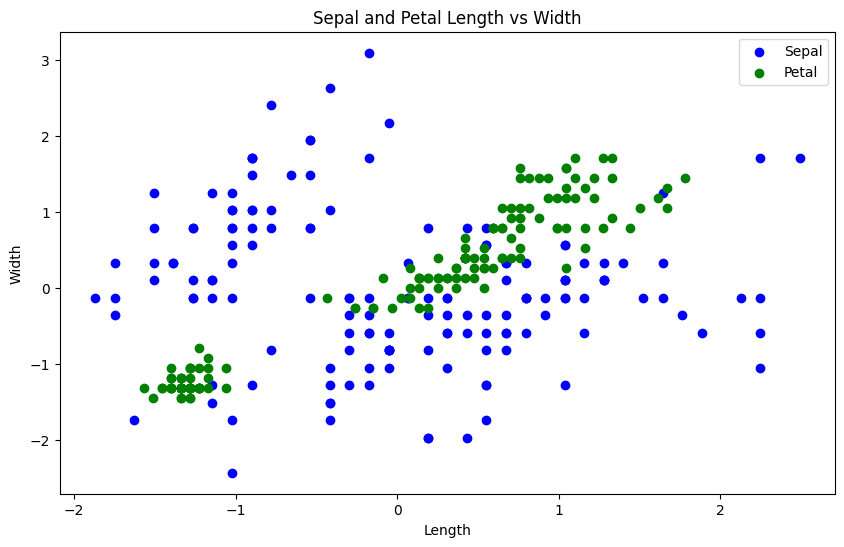

In [10]:
# Step 3: Visualize the Data
# For simplicity, let's visualize two features with a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled['sepal_length'], data_scaled['sepal_width'], c='blue', label='Sepal')
plt.scatter(data_scaled['petal_length'], data_scaled['petal_width'], c='green', label='Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Sepal and Petal Length vs Width')
plt.legend()
plt.show()